## Illuminating Solar Potential: A Real-Time Deep Learning, IoT, and Image Processing Approach to Ground-Based Cloud Movement Forecasting for Enhanced Solar Energy Management

### Development of Deep Learning Framework for Forecasting Solar PV Power Levels based on Cloud Motions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the CSV file path
file_path = "C:/Users/acer/OneDrive - University of Moratuwa/S8 - R & D Project DA4900/Data - Cloud Pixel Matrices/cloud_data.csv"

# Load the data
df = pd.read_csv(file_path)
df

,ImageName,CloudPixelCount,SunPixelCount
0,190.jpg,"[[14143, 14421, 16384, 16183, 12963, 15994, 16...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2361, 146..."
1,191.jpg,"[[2675, 14216, 9935, 13996, 15856, 14604, 4956...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 21, 0, 0,..."
2,192.jpg,"[[9499, 10755, 11205, 16363, 12275, 716, 13198...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
3,193.jpg,"[[9096, 4400, 8805, 14321, 16270, 16384, 16384...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
4,194.jpg,"[[13111, 14234, 16384, 16384, 16384, 16384, 16...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
...,...,...,...
155,347.jpg,"[[16127, 12088, 13396, 16384, 16384, 13907, 16...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
156,348.jpg,"[[16365, 15998, 15893, 16384, 16384, 15164, 13...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
157,349.jpg,"[[14216, 7190, 14890, 16384, 16336, 7668, 9525...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
158,350.jpg,"[[6550, 2296, 11362, 16384, 16384, 12282, 9441...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ImageName        160 non-null    object
 1   CloudPixelCount  160 non-null    object
 2   SunPixelCount    160 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


### Data Preprocessing

##### Convert string representations of matrices to actual NumPy arrays

In [4]:
df['CloudPixelCount'] = df['CloudPixelCount'].apply(eval).apply(np.array)
df['SunPixelCount'] = df['SunPixelCount'].apply(eval).apply(np.array)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ImageName        160 non-null    object
 1   CloudPixelCount  160 non-null    object
 2   SunPixelCount    160 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [5]:
print(type(df['CloudPixelCount'].iloc[0]))  # Should output: <class 'numpy.ndarray'>
print(df['CloudPixelCount'].iloc[0].shape)  # Outputs the shape of the matrix
print(df['CloudPixelCount'].iloc[0])

<class 'numpy.ndarray'>
(8, 8)
[[14143 14421 16384 16183 12963 15994 16346  3454]
 [16275 16384 16384  9248 14324  9510 15119  6345]
 [16301 16384 16384 14701 12845  8432  2856  2619]
 [11726 16155 16384 16384 14609 11020  1375  9349]
 [ 3919 11773 16384 16384 14532  8756  3323 13176]
 [ 9019  5449 16384 16384  9770 11176 12531 16384]
 [14773 13895 16384 16384  5459  1098 11082  8169]
 [10152 16092 16384 16384 16088 12224  5709 10756]]


In [6]:
print(type(df['SunPixelCount'].iloc[0]))  
print(df['SunPixelCount'].iloc[0].shape)  
print(df['SunPixelCount'].iloc[0])

<class 'numpy.ndarray'>
(8, 8)
[[    0     0     0     0     0     0     0     0]
 [    0     0     0  2361 14686  3124     0     0]
 [    0     0     0  1208 12449 13550  1683     0]
 [ 4353   361     0     0  8288 16384  9066     0]
 [14830  6921     0     0  7196 16384 14472     0]
 [16345 15900  3685     0  9143 10971  3906     0]
 [16384 16384 15835 10194 15949 16026  6628  2598]
 [15887 16384 16384 16384 14664  7871 12593  2348]]


In [7]:
# Define a function to compute the overlap matrix
def compute_overlap_matrix(cloud_matrix, sun_matrix):
    # Create a matrix of the same shape with zeros
    overlap_matrix = np.zeros_like(cloud_matrix)
    
    # Iterate through each element and apply the condition
    overlap_matrix[(cloud_matrix > 0) & (sun_matrix > 0)] = 1
    
    return overlap_matrix

# Apply the function to each row in the DataFrame
df['OverlapCount'] = df.apply(lambda row: compute_overlap_matrix(row['CloudPixelCount'], row['SunPixelCount']), axis=1)

# Print the DataFrame to check the new column
df[['ImageName', 'CloudPixelCount', 'SunPixelCount', 'OverlapCount']].head()

,ImageName,CloudPixelCount,SunPixelCount,OverlapCount
0,190.jpg,"[[14143, 14421, 16384, 16183, 12963, 15994, 16...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2361, 146...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, ..."
1,191.jpg,"[[2675, 14216, 9935, 13996, 15856, 14604, 4956...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 21, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ..."
2,192.jpg,"[[9499, 10755, 11205, 16363, 12275, 716, 13198...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
3,193.jpg,"[[9096, 4400, 8805, 14321, 16270, 16384, 16384...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
4,194.jpg,"[[13111, 14234, 16384, 16384, 16384, 16384, 16...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."


In [8]:
# Function to compute movement vectors
def compute_movement_vector(arrays):
    movement_vectors = [arrays[i + 1] - arrays[i] for i in range(len(arrays) - 1)]
    return movement_vectors

# Compute movement vectors
cloud_movement_vectors = compute_movement_vector(df['CloudPixelCount'])
sun_movement_vectors = compute_movement_vector(df['SunPixelCount'])

# For the first entry, there's no previous data, so the movement vector is zero
cloud_movement_vectors = [np.zeros_like(df['CloudPixelCount'][0])] + cloud_movement_vectors
sun_movement_vectors = [np.zeros_like(df['SunPixelCount'][0])] + sun_movement_vectors

# Assign to DataFrame
df['CloudMovementVector'] = cloud_movement_vectors
df['SunMovementVector'] = sun_movement_vectors

df.head()

,ImageName,CloudPixelCount,SunPixelCount,OverlapCount,CloudMovementVector,SunMovementVector
0,190.jpg,"[[14143, 14421, 16384, 16183, 12963, 15994, 16...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2361, 146...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
1,191.jpg,"[[2675, 14216, 9935, 13996, 15856, 14604, 4956...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 21, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, ...","[[-11468, -205, -6449, -2187, 2893, -1390, -11...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, -2340, -1..."
2,192.jpg,"[[9499, 10755, 11205, 16363, 12275, 716, 13198...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[6824, -3461, 1270, 2367, -3581, -13888, 8242...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -3, -21, 0, ..."
3,193.jpg,"[[9096, 4400, 8805, 14321, 16270, 16384, 16384...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-403, -6355, -2400, -2042, 3995, 15668, 3186...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
4,194.jpg,"[[13111, 14234, 16384, 16384, 16384, 16384, 16...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[4015, 9834, 7579, 2063, 114, 0, 0, 0], [6120...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."


In [9]:
df.shape

(160, 6)

In [24]:
df.columns

Index(['ImageName', 'CloudPixelCount', 'SunPixelCount', 'OverlapCount',
       'CloudMovementVector', 'SunMovementVector'],
      dtype='object')

### Model Building -  ConvLSTM

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv2D, Dropout, Dense

In [11]:
# Function to prepare data for ConvLSTM
def prepare_data_for_convlstm(df, timesteps=3):
    X = []
    Y = []
    
    for i in range(len(df) - timesteps):
        # Extract sequences for each timestep
        cloud_sequence = np.array(df['CloudPixelCount'].iloc[i:i+timesteps].values.tolist())
        sun_sequence = np.array(df['SunPixelCount'].iloc[i:i+timesteps].values.tolist())
        overlap_sequence = np.array(df['OverlapCount'].iloc[i:i+timesteps].values.tolist())
        movement_cloud_sequence = np.array(df['CloudMovementVector'].iloc[i:i+timesteps].values.tolist())
        movement_sun_sequence = np.array(df['SunMovementVector'].iloc[i:i+timesteps].values.tolist())

        # Stack all feature sequences along the new dimension (channels)
        input_sequence = np.stack((cloud_sequence, sun_sequence, overlap_sequence, \
                                   movement_cloud_sequence, movement_sun_sequence), axis=-1)
        output_sequence = np.array(df['OverlapCount'].iloc[i + timesteps])  # The next `OverlapCount` matrix to predict
        
        X.append(input_sequence)
        Y.append(output_sequence)
    
    X = np.array(X)
    Y = np.array(Y)
    
    # Reshape X for ConvLSTM: (samples, timesteps, rows, cols, channels)
    X = X.reshape((X.shape[0], timesteps, 8, 8, 5))  # 5 channels for the 5 features
    Y = Y.reshape((Y.shape[0], 8, 8, 1))
    
    return X, Y

# Prepare your data
timesteps = 3
X, Y = prepare_data_for_convlstm(df, timesteps)
print(f'X shape: {X.shape}, Y shape: {Y.shape}')

X shape: (157, 3, 8, 8, 5), Y shape: (157, 8, 8, 1)


In [12]:
from keras_tuner.tuners import RandomSearch
from keras.regularizers import l2
import tensorflow as tf
from keras_tuner import HyperModel

In [13]:
# Example definitions based on your data
timesteps = 3  # Number of time steps in your input sequences
height = 8     # Height of the input images
width = 8      # Width of the input images
channels = 5   # Number of channels in the input data (e.g., 5 for different features) # Update channels to 5

In [26]:
# Define the hyperparameter tuning model
class ConvLSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        input_shape = (timesteps, height, width, channels)

        # Add ConvLSTM layers with tunable filters and kernel size
        model.add(ConvLSTM2D(
            filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
            kernel_size=(hp.Choice('kernel_size_1', [3, 5])),
            input_shape=input_shape,
            padding='same',
            return_sequences=True,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_1', min_value=1e-4, max_value=1e-2, sampling='log'))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)))

        model.add(ConvLSTM2D(
            filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
            kernel_size=(hp.Choice('kernel_size_2', [3, 5])),
            padding='same',
            return_sequences=False,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_2', min_value=1e-4, max_value=1e-2, sampling='log'))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)))

        model.add(Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid', padding='same'))

        # Compile the model with a tunable learning rate
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
            ),
            loss='mean_squared_error',
            metrics=['mae']
        )
        return model

In [27]:
# Set up the RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    ConvLSTMHyperModel(),
    objective='val_loss',
    max_trials=30,
    executions_per_trial=2,
    directory='hyperparam_tuning_85',
    project_name='convlstm_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

# Retrieve the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hp)

Trial 30 Complete [00h 01m 48s]
val_loss: 0.19873027503490448

Best val_loss So Far: 0.1649017408490181
Total elapsed time: 00h 40m 26s


In [15]:
# Split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f'Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}')

Training data: (109, 3, 8, 8, 5), Validation data: (24, 3, 8, 8, 5), Test data: (24, 3, 8, 8, 5)


In [33]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=1e-5
)

# Train the best model
history = best_model.fit(X_train, Y_train, epochs=50, batch_size=8, 
                         validation_data=(X_val, Y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 400ms/step - loss: 0.2709 - mae: 0.3673 - val_loss: 0.2469 - val_mae: 0.2884 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.1767 - mae: 0.2284 - val_loss: 0.2444 - val_mae: 0.2943 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.1626 - mae: 0.2154 - val_loss: 0.2328 - val_mae: 0.2632 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.1555 - mae: 0.2107 - val_loss: 0.2272 - val_mae: 0.2651 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 0.1392 - mae: 0.2054 - val_loss: 0.1948 - val_mae: 0.2468 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.1519 - mae: 0.2146 - val_loss: 0.2124 - val_mae: 0.2636 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.1265 - mae: 0.2011 - val_loss: 0.1691 - val_mae: 0.2282 - learning_rate: 0.0010
Epoch

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test data using the best model
Y_pred = best_model.predict(X_test)

# Flatten the predictions and actuals for comparison
Y_pred_flat = Y_pred.flatten()
Y_test_flat = Y_test.flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test_flat, Y_pred_flat))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Calculate MAE
mae = mean_absolute_error(Y_test_flat, Y_pred_flat)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Calculate R²
r2 = r2_score(Y_test_flat, Y_pred_flat)
print(f'R² Score: {r2:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Root Mean Squared Error (RMSE): 0.4300
Mean Absolute Error (MAE): 0.2976
R² Score: 0.1781


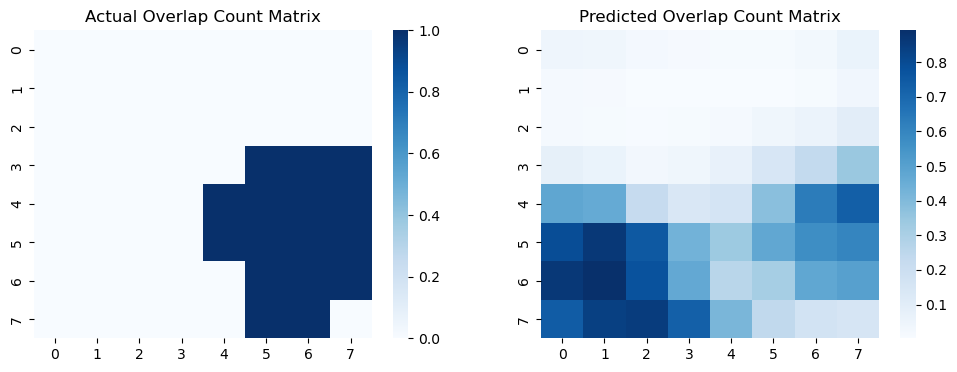

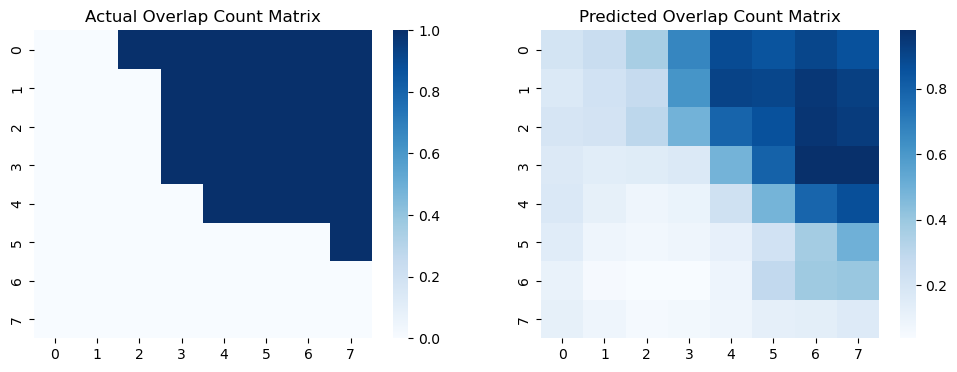

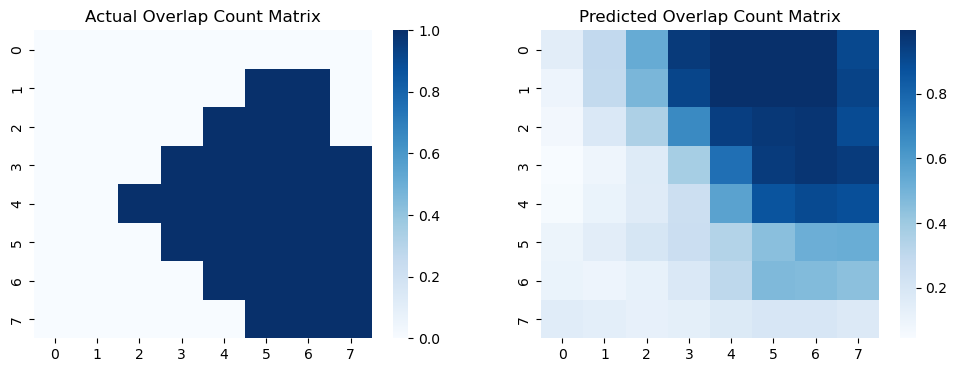

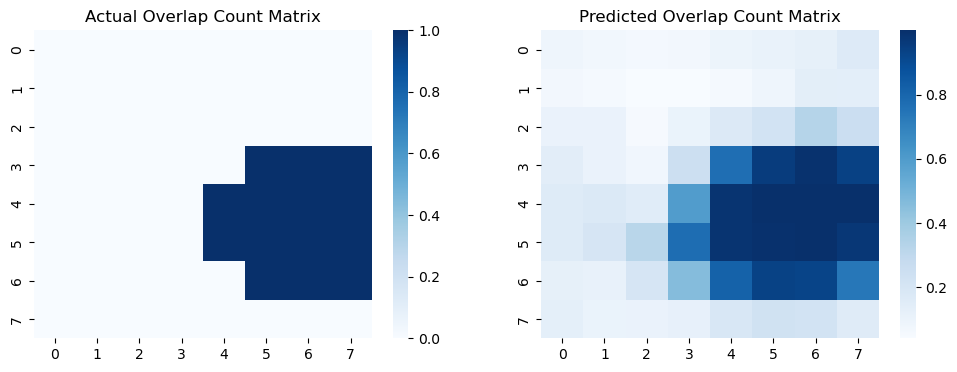

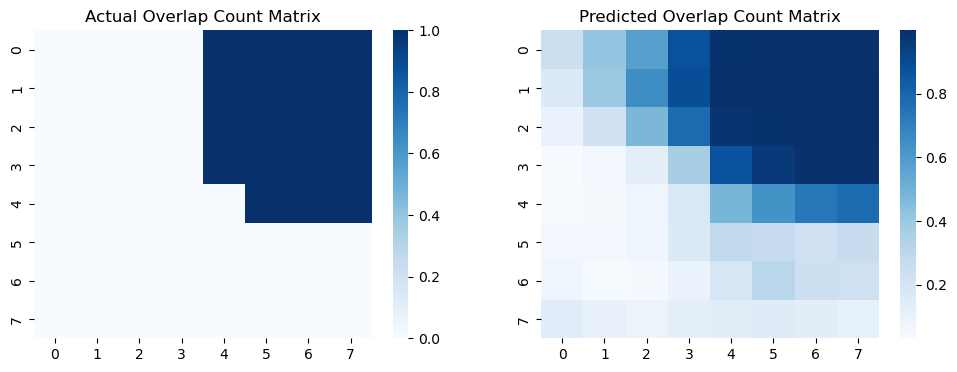

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten predictions and actuals for visualization purposes
preds_flat = Y_pred.reshape(-1, 8, 8)  # Ensure predictions are reshaped to (num_samples, 8, 8)
Y_test_flat_reshaped = Y_test.reshape(-1, 8, 8)  # Ensure actual values are reshaped to (num_samples, 8, 8)

# Use different color palettes for comparison
for i in range(5):
    plt.figure(figsize=(12, 4))
    
    # Actual Overlap Count
    plt.subplot(1, 2, 1)
    sns.heatmap(Y_test_flat_reshaped[i], cmap='Blues', annot=False, cbar=True)  # Example of a ColorBrewer palette
    plt.title('Actual Overlap Count Matrix')
    
    # Predicted Overlap Count
    plt.subplot(1, 2, 2)
    sns.heatmap(preds_flat[i], cmap='Blues', annot=False, cbar=True)  # Another ColorBrewer palette
    plt.title('Predicted Overlap Count Matrix')
    
    plt.show()

In [18]:
# Define the hyperparameter tuning model
class ConvLSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        input_shape = (timesteps, height, width, channels)

        # Add ConvLSTM layers with tunable filters and kernel size
        model.add(ConvLSTM2D(
            filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
            kernel_size=(hp.Choice('kernel_size_1', [3, 5])),
            input_shape=input_shape,
            padding='same',
            return_sequences=True,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_1', min_value=1e-4, max_value=1e-2, sampling='log'))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)))

        model.add(ConvLSTM2D(
            filters=hp.Int('filters_1', min_value=64, max_value=256, step=64),
            kernel_size=(hp.Choice('kernel_size_1', [3, 5])),
            padding='same',
            return_sequences=True,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_1', min_value=1e-5, max_value=1e-4))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)))

        model.add(ConvLSTM2D(filters=1, kernel_size=(1, 1), activation='sigmoid', padding='same'))

        # Compile the model with a tunable learning rate
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                learning_rate=hp.Choice('learning_rate', [5e-4, 1e-4, 5e-5])
            ),
            loss='mean_squared_error',
            metrics=['mae']
        )
        return model

In [19]:
# Set up the RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    ConvLSTMHyperModel(),
    objective='val_loss',
    max_trials=30,
    executions_per_trial=2,
    directory='hyperparam_tuning_85',
    project_name='convlstm_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

# Retrieve the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hp)

Reloading Tuner from hyperparam_tuning_85\convlstm_tuning\tuner0.json


C:\Users\acer\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.7, 
    patience=10, 
    min_lr=1e-5
)

# Train the best model
history = best_model.fit(X_train, Y_train, epochs=100, batch_size=8, 
                         validation_data=(X_val, Y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - loss: 0.2151 - mae: 0.3545 - val_loss: 0.1724 - val_mae: 0.2767 - learning_rate: 0.0010
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1454 - mae: 0.2482 - val_loss: 0.1562 - val_mae: 0.2510 - learning_rate: 0.0010
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1273 - mae: 0.2198 - val_loss: 0.1371 - val_mae: 0.2359 - learning_rate: 0.0010
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1286 - mae: 0.2135 - val_loss: 0.1411 - val_mae: 0.2315 - learning_rate: 0.0010
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1011 - mae: 0.1780 - val_loss: 0.1330 - val_mae: 0.2115 - learning_rate: 0.0010
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1065 - mae: 0.1845 - val_loss: 0.1282 - val_mae: 0.2073 - learning_rate: 0.0010
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1018 - mae: 0.1732 - val_loss: 0.1213 - val_mae: 0.1950 - learning_rate: 0.0010
Epoc

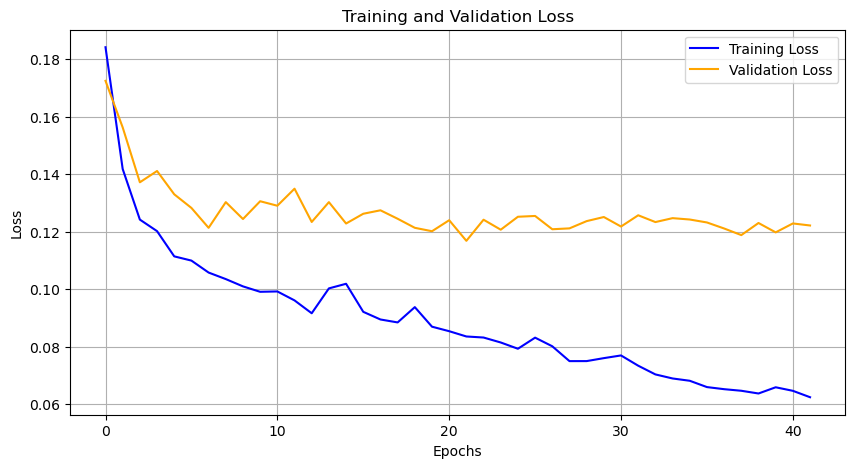

In [21]:
import matplotlib.pyplot as plt

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Make predictions on the test data
Y_pred = best_model.predict(X_test)

# Print the first 5 predictions to verify
print("First 5 predictions:")
print(Y_pred[:5])

# Check the range of predictions to verify if they are continuous or binary (0 or 1)
print("Range of predictions:", Y_pred.min(), "-", Y_pred.max())

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
First 5 predictions:
[[[[0.01841588]
   [0.02805508]
   [0.02863934]
   [0.02555547]
   [0.01160852]
   [0.01276292]
   [0.01483318]
   [0.04155026]]

  [[0.00899052]
   [0.01694095]
   [0.02379153]
   [0.01793682]
   [0.01316391]
   [0.01310069]
   [0.00806401]
   [0.02592751]]

  [[0.00512214]
   [0.01054284]
   [0.03992118]
   [0.04935068]
   [0.08320202]
   [0.13041514]
   [0.1393389 ]
   [0.09063259]]

  [[0.00738485]
   [0.01713235]
   [0.04140308]
   [0.12586609]
   [0.8159757 ]
   [0.9144913 ]
   [0.9014391 ]
   [0.8112754 ]]

  [[0.00881769]
   [0.01111282]
   [0.05093636]
   [0.29813665]
   [0.905477  ]
   [0.93310463]
   [0.92784804]
   [0.91777927]]

  [[0.00519741]
   [0.00585928]
   [0.02779046]
   [0.24298364]
   [0.8870867 ]
   [0.9342866 ]
   [0.9324294 ]
   [0.920477  ]]

  [[0.00553907]
   [0.00335368]
   [0.00294707]
   [0.00220181]
   [0.04770001]
   [0.88636845]
   [0.8994558 ]
   [0.8734415 ]]

  [[0.01479085]
   [0.00763345]
 

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test data using the best model
Y_pred = best_model.predict(X_test)

# Flatten the predictions and actuals for comparison
Y_pred_flat = Y_pred.flatten()
Y_test_flat = Y_test.flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test_flat, Y_pred_flat))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Calculate MAE
mae = mean_absolute_error(Y_test_flat, Y_pred_flat)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Calculate R²
r2 = r2_score(Y_test_flat, Y_pred_flat)
print(f'R² Score: {r2:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Root Mean Squared Error (RMSE): 0.2686
Mean Absolute Error (MAE): 0.1763
R² Score: 0.6907


#### Hyperparameter Tuning: Continue tuning hyperparameters beyond just learning rate and dropout. Consider tuning batch size, optimizer types (e.g., Adam, RMSprop), and other architectural parameters.

In [41]:
from keras_tuner import HyperModel, RandomSearch
from keras.models import Sequential
from keras.layers import ConvLSTM2D, BatchNormalization, Dropout
from keras.regularizers import l2
import tensorflow as tf

# Define the hyperparameter tuning model
class ConvLSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        input_shape = (timesteps, height, width, channels)

        # Add ConvLSTM layers with tunable filters and kernel size
        model.add(ConvLSTM2D(
            filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
            kernel_size=(hp.Choice('kernel_size_1', [3, 5])),
            input_shape=input_shape,
            padding='same',
            return_sequences=True,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_1', min_value=1e-4, max_value=1e-2, sampling='log'))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)))

        model.add(ConvLSTM2D(
            filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
            kernel_size=(hp.Choice('kernel_size_2', [3, 5])),
            padding='same',
            return_sequences=True,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_2', min_value=1e-5, max_value=1e-4))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)))

        model.add(ConvLSTM2D(filters=1, kernel_size=(1, 1), activation='sigmoid', padding='same'))

        # Compile the model with tunable optimizer and learning rate
        optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(
                learning_rate=hp.Choice('learning_rate', [5e-4, 1e-4, 5e-5])
            )
        else:
            optimizer = tf.keras.optimizers.RMSprop(
                learning_rate=hp.Choice('learning_rate', [5e-4, 1e-4, 5e-5])
            )
        
        model.compile(
            optimizer=optimizer,
            loss='mean_squared_error',
            metrics=['mae']
        )
        return model

In [43]:
# Set up the RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    ConvLSTMHyperModel(),
    objective='val_loss',
    max_trials=30,
    executions_per_trial=2,
    directory='hyperparam_tuning_85',
    project_name='convlstm_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

# Retrieve the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hp)

Reloading Tuner from hyperparam_tuning_85\convlstm_tuning\tuner0.json


C:\Users\acer\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.7, 
    patience=10, 
    min_lr=1e-5
)

# Train the best model
history = best_model.fit(X_train, Y_train, epochs=100, batch_size=8, 
                         validation_data=(X_val, Y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0435 - mae: 0.0840 - val_loss: 0.1106 - val_mae: 0.1576 - learning_rate: 5.7648e-05
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0429 - mae: 0.0812 - val_loss: 0.1109 - val_mae: 0.1598 - learning_rate: 5.7648e-05
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0415 - mae: 0.0817 - val_loss: 0.1118 - val_mae: 0.1612 - learning_rate: 5.7648e-05
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0454 - mae: 0.0856 - val_loss: 0.1125 - val_mae: 0.1615 - learning_rate: 5.7648e-05
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0422 - mae: 0.0813 - val_loss: 0.1125 - val_mae: 0.1607 - learning_rate: 5.7648e-05
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0376 - mae: 0.0747 - val_loss: 0.1134 - val_mae: 0.1619 - learning_rate: 5.7648e-05
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0400 - mae: 0.0808 - val_loss: 0.1129 - val_mae: 0.1604 - l

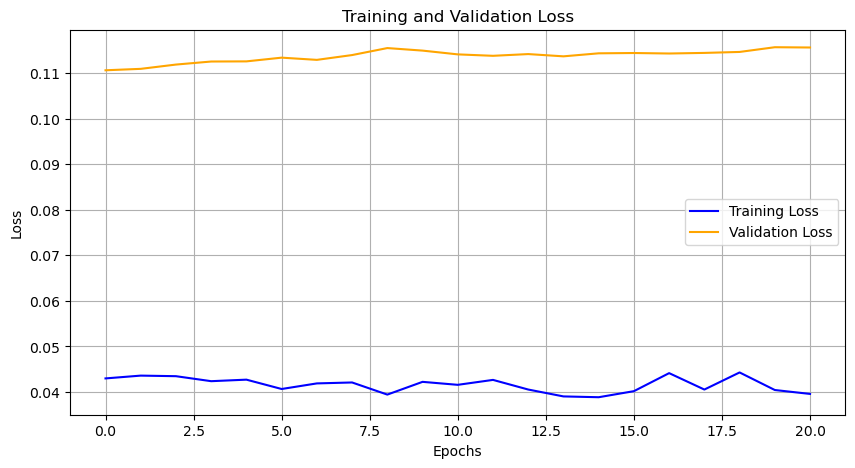

In [54]:
import matplotlib.pyplot as plt

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test data using the best model
Y_pred = best_model.predict(X_test)

# Flatten the predictions and actuals for comparison
Y_pred_flat = Y_pred.flatten()
Y_test_flat = Y_test.flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test_flat, Y_pred_flat))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Calculate MAE
mae = mean_absolute_error(Y_test_flat, Y_pred_flat)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Calculate R²
r2 = r2_score(Y_test_flat, Y_pred_flat)
print(f'R² Score: {r2:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Root Mean Squared Error (RMSE): 0.2947
Mean Absolute Error (MAE): 0.1357
R² Score: 0.6277


In [17]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to build and return the ConvLSTM model
def build_model():
    model = Sequential()
    input_shape = (timesteps, height, width, channels)
    
    model.add(ConvLSTM2D(filters=128, kernel_size=(3, 3), input_shape=input_shape,
                         padding='same', return_sequences=True, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(ConvLSTM2D(filters=128, kernel_size=(3, 3), padding='same', return_sequences=False, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid', padding='same'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Train multiple ConvLSTM models with different random seeds
models = [build_model() for _ in range(5)]
for model in models:
    model.fit(X_train, Y_train, epochs=50, batch_size=8, validation_data=(X_val, Y_val), verbose=0)

# Create a voting regressor ensemble by averaging the predictions of the models
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return np.mean(predictions, axis=0)

# Get predictions and evaluate ensemble
Y_pred_ensemble = ensemble_predict(models, X_test)
rmse = np.sqrt(mean_squared_error(Y_test.flatten(), Y_pred_ensemble.flatten()))
mae = mean_absolute_error(Y_test.flatten(), Y_pred_ensemble.flatten())
r2 = r2_score(Y_test.flatten(), Y_pred_ensemble.flatten())

print(f'Ensemble RMSE: {rmse:.4f}')
print(f'Ensemble MAE: {mae:.4f}')
print(f'Ensemble R²: {r2:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Ensemble RMSE: 0.2928
Ensemble MAE: 0.1393
Ensemble R²: 0.6325


#### Model Building -  ConvLSTM
##### for classification
    The output layer would predict probabilities for class labels (e.g., 0 for no cloud, 1 for cloud coverage)

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv2D, Dropout, Dense

In [26]:
# Function to prepare data for ConvLSTM
def prepare_data_for_convlstm(df, timesteps=3):
    X = []
    Y = []
    
    for i in range(len(df) - timesteps):
        # Extract sequences for each timestep
        cloud_sequence = np.array(df['CloudPixelCount'].iloc[i:i+timesteps].values.tolist())
        sun_sequence = np.array(df['SunPixelCount'].iloc[i:i+timesteps].values.tolist())
        overlap_sequence = np.array(df['OverlapCount'].iloc[i:i+timesteps].values.tolist())
        movement_cloud_sequence = np.array(df['CloudMovementVector'].iloc[i:i+timesteps].values.tolist())
        movement_sun_sequence = np.array(df['SunMovementVector'].iloc[i:i+timesteps].values.tolist())

        # Stack all feature sequences along the new dimension (channels)
        input_sequence = np.stack((cloud_sequence, sun_sequence, overlap_sequence, \
                                   movement_cloud_sequence, movement_sun_sequence), axis=-1)
        output_sequence = np.array(df['OverlapCount'].iloc[i + timesteps])  # The next `OverlapCount` matrix to predict
        
        X.append(input_sequence)
        Y.append(output_sequence)
    
    X = np.array(X)
    Y = np.array(Y)
    
    # Reshape X for ConvLSTM: (samples, timesteps, rows, cols, channels)
    X = X.reshape((X.shape[0], timesteps, 8, 8, 5))  # 5 channels for the 5 features
    Y = Y.reshape((Y.shape[0], 8, 8, 1))
    
    return X, Y

# Prepare your data
timesteps = 3
X, Y = prepare_data_for_convlstm(df, timesteps)
print(f'X shape: {X.shape}, Y shape: {Y.shape}')

X shape: (157, 3, 8, 8, 5), Y shape: (157, 8, 8, 1)


In [27]:
from keras_tuner.tuners import RandomSearch
from keras.regularizers import l2
import tensorflow as tf
from keras_tuner import HyperModel

In [28]:
# Example definitions based on your data
timesteps = 3  # Number of time steps in your input sequences
height = 8     # Height of the input images
width = 8      # Width of the input images
channels = 5   # Number of channels in the input data (e.g., 5 for different features) # Update channels to 5

In [30]:
# Split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f'Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}')

Training data: (109, 3, 8, 8, 5), Validation data: (24, 3, 8, 8, 5), Test data: (24, 3, 8, 8, 5)


In [29]:
# Set up the RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    ConvLSTMHyperModel(),
    objective='val_loss',
    max_trials=30,
    executions_per_trial=2,
    directory='hyperparam_tuning_85',
    project_name='convlstm_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

# Retrieve the best hyperparameters and model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hp)

Reloading Tuner from hyperparam_tuning_85\convlstm_tuning\tuner0.json


C:\Users\acer\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Define the hyperparameter tuning model for binary classification
class ConvLSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        input_shape = (timesteps, height, width, channels)

        # Add ConvLSTM layers with tunable filters and kernel size
        model.add(ConvLSTM2D(
            filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
            kernel_size=(hp.Choice('kernel_size_1', [3, 5])),
            input_shape=input_shape,
            padding='same',
            return_sequences=True,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_1', min_value=1e-4, max_value=1e-2, sampling='log'))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)))

        model.add(ConvLSTM2D(
            filters=hp.Int('filters_1', min_value=64, max_value=256, step=64),
            kernel_size=(hp.Choice('kernel_size_1', [3, 5])),
            padding='same',
            return_sequences=True,
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_regularizer_1', min_value=1e-5, max_value=1e-4))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)))

        # Final ConvLSTM layer with sigmoid activation for binary classification
        model.add(ConvLSTM2D(filters=1, kernel_size=(1, 1), activation='sigmoid', padding='same'))

        # Compile the model with binary cross-entropy for classification and accuracy as a metric
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                learning_rate=hp.Choice('learning_rate', [5e-4, 1e-4, 5e-5])
            ),
            loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
            metrics=['accuracy']  # Track accuracy along with other metrics
        )
        return model

In [32]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.7, 
    patience=10, 
    min_lr=1e-5
)

# Train the best model
history = best_model.fit(X_train, Y_train, epochs=100, batch_size=8, 
                         validation_data=(X_val, Y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - loss: 0.2331 - mae: 0.3706 - val_loss: 0.2065 - val_mae: 0.3629 - learning_rate: 0.0010
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1468 - mae: 0.2589 - val_loss: 0.2414 - val_mae: 0.3834 - learning_rate: 0.0010
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1271 - mae: 0.2168 - val_loss: 0.2254 - val_mae: 0.3457 - learning_rate: 0.0010
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1244 - mae: 0.2104 - val_loss: 0.1614 - val_mae: 0.2776 - learning_rate: 0.0010
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.1158 - mae: 0.1957 - val_loss: 0.1386 - val_mae: 0.2536 - learning_rate: 0.0010
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1125 - mae: 0.1948 - val_loss: 0.1307 - val_mae: 0.2234 - learning_rate: 0.0010
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0983 - mae: 0.1722 - val_loss: 0.1269 - val_mae: 0.2310 - learning_rate: 0.0010
Epoc

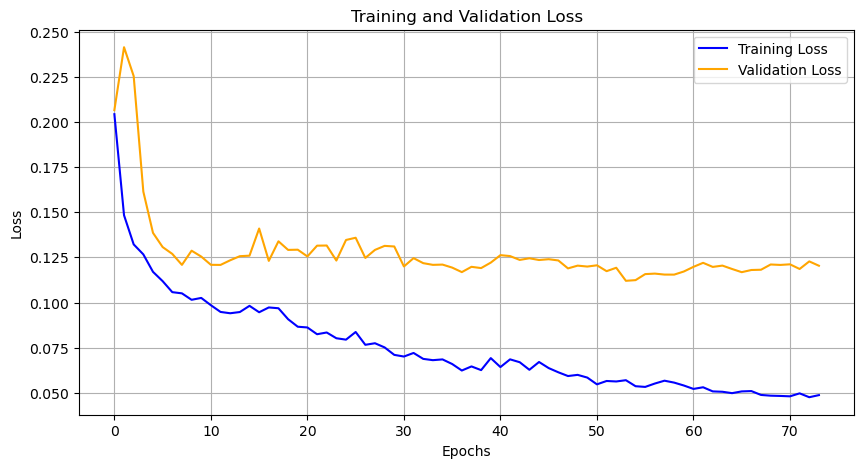

In [33]:
import matplotlib.pyplot as plt

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Predict probabilities on the test data
Y_pred_probs = best_model.predict(X_test)

# Apply a threshold of 0.5 to get class labels (0 or 1)
Y_pred_classes = (Y_pred_probs > 0.5).astype(int)

# Print the first few predictions to verify
print(Y_pred_classes[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[[[0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [0]
   [0]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [0]
   [1]
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   [0]
   [0]
   [1]
   [1]
   [0]]]


 [[[1]
   [1]
   [1]
   [1]
   [

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test data using the best model
Y_pred_probs = best_model.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
Y_pred_classes = (Y_pred_probs > 0.5).astype(int)

# Flatten the predictions and actuals for comparison
Y_pred_flat = Y_pred_classes.flatten()
Y_test_flat = Y_test.flatten()

# Calculate Accuracy
accuracy = accuracy_score(Y_test_flat, Y_pred_flat)
print(f'Accuracy: {accuracy:.4f}')

# Calculate Precision
precision = precision_score(Y_test_flat, Y_pred_flat)
print(f'Precision: {precision:.4f}')

# Calculate Recall
recall = recall_score(Y_test_flat, Y_pred_flat)
print(f'Recall: {recall:.4f}')

# Calculate F1-Score
f1 = f1_score(Y_test_flat, Y_pred_flat)
print(f'F1 Score: {f1:.4f}')

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(Y_test_flat, Y_pred_flat)
print('Confusion Matrix:')
print(conf_matrix)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Accuracy: 0.8984
Precision: 0.8604
Recall: 0.8664
F1 Score: 0.8634
Confusion Matrix:
[[887  80]
 [ 76 493]]


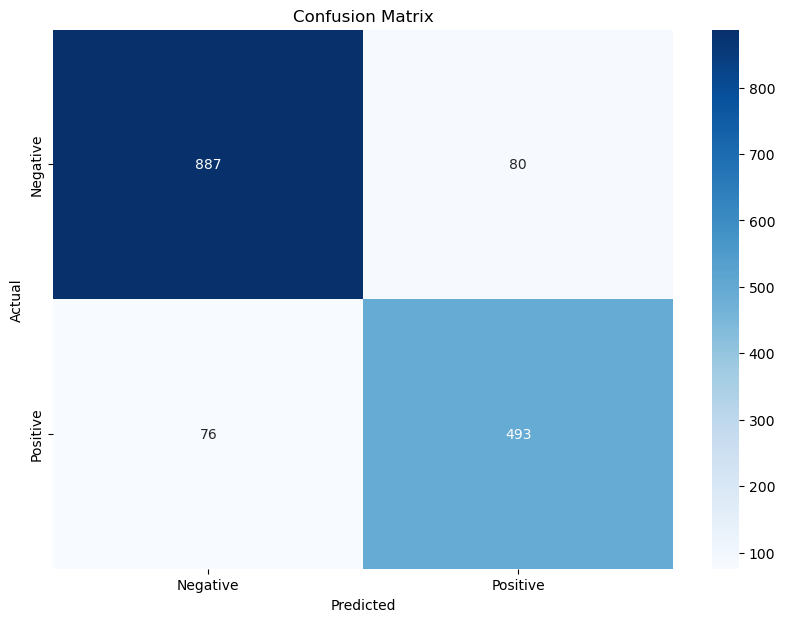

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

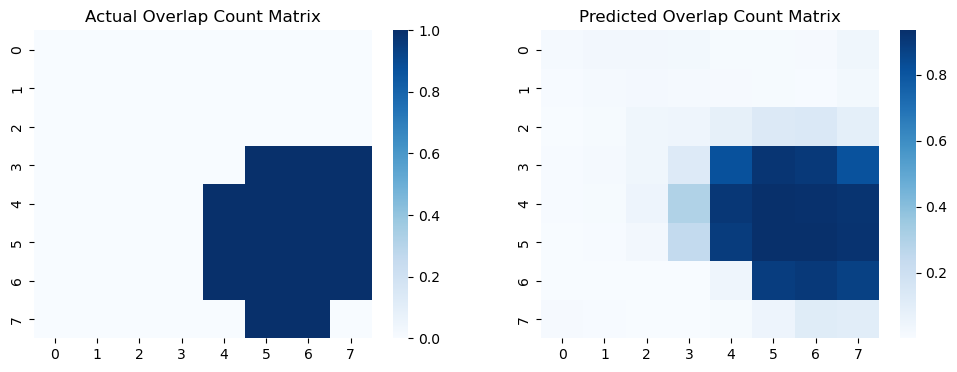

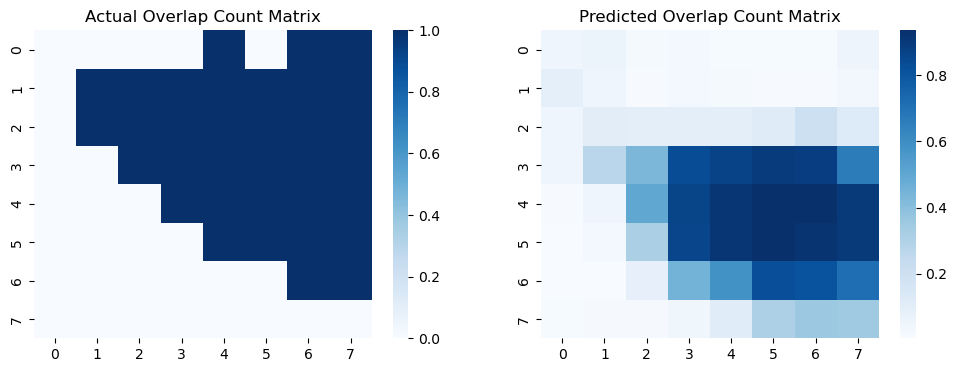

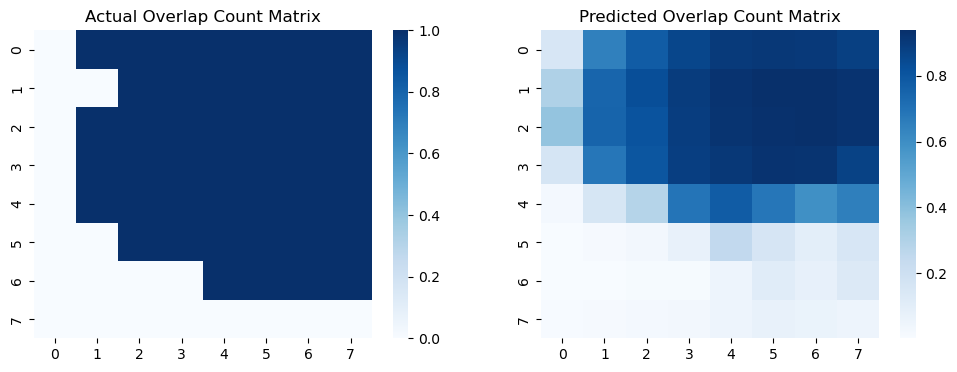

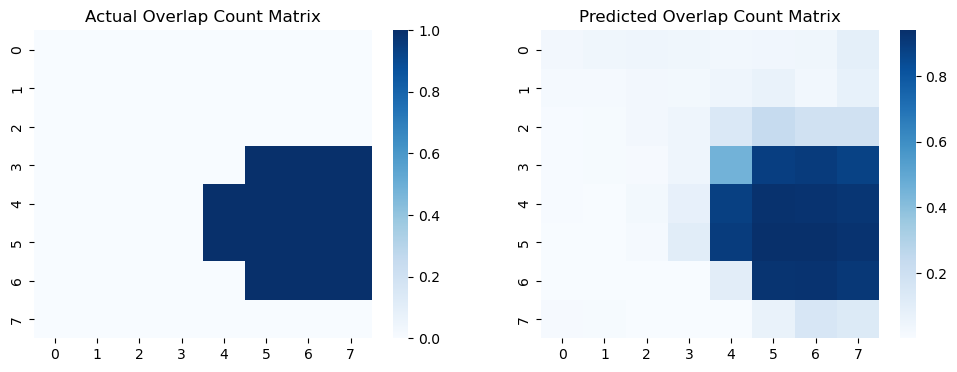

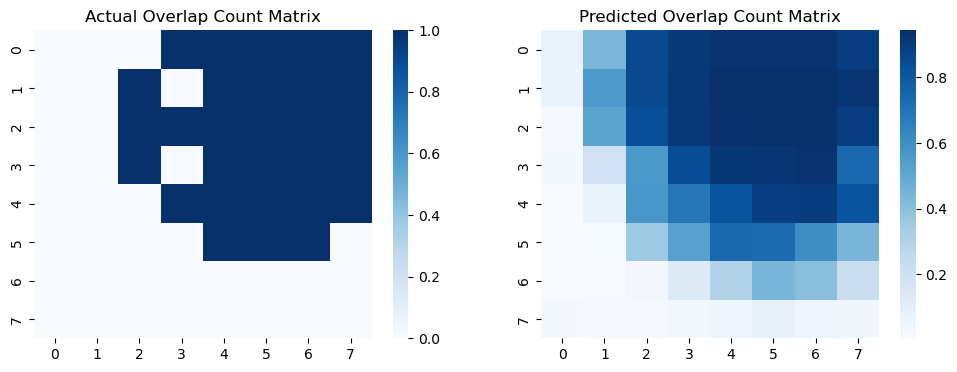

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten predictions and actuals for visualization purposes
preds_flat = Y_pred.reshape(-1, 8, 8)  # Ensure predictions are reshaped to (num_samples, 8, 8)
Y_test_flat_reshaped = Y_test.reshape(-1, 8, 8)  # Ensure actual values are reshaped to (num_samples, 8, 8)

# Use different color palettes for comparison
for i in range(5):
    plt.figure(figsize=(12, 4))
    
    # Actual Overlap Count
    plt.subplot(1, 2, 1)
    sns.heatmap(Y_test_flat_reshaped[i], cmap='Blues', annot=False, cbar=True)  # Example of a ColorBrewer palette
    plt.title('Actual Overlap Count Matrix')
    
    # Predicted Overlap Count
    plt.subplot(1, 2, 2)
    sns.heatmap(preds_flat[i], cmap='Blues', annot=False, cbar=True)  # Another ColorBrewer palette
    plt.title('Predicted Overlap Count Matrix')
    
    plt.show()